In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch import optim
from tqdm.notebook import tqdm 
import random as rd
import matplotlib.pyplot as plt

# I. Data loading 

## 1. Importation of the data

In [3]:
#the training and validation dataset
data_train_val=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\training_set\SS_0.csv')
for i in range(1,100):
    small_data_train_val=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\training_set\SS_'+str(i)+'.csv')
    data_train_val=pd.concat([data_train_val,small_data_train_val])

data_train_val.insert(column='s', value=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\parameters_tree.csv').iloc[:100000,5], loc=100)

In [4]:
data_train_val.index=range(100000)

In [5]:
del(data_train_val['Unnamed: 0'])
del(data_train_val['2'])
del(data_train_val['19'])

In [6]:
data_train_val

,0,1,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,s
0,20.386406,1.680395,0.635450,1.182238,1.078058,0.718366,1.337771,1.067431,0.519928,1.735265,...,1.507175,1.705495,1.987344,2.403216,2.932380,3.829969,7.227851,1.491786,0.425961,0.425961
1,19.638129,0.184916,0.633585,1.133277,1.095872,0.748164,1.286046,1.236345,1.174375,0.841423,...,1.674072,1.860036,2.112977,2.382621,2.791814,3.473909,8.250819,1.194377,0.540752,0.540752
2,14.579004,2.734864,0.632753,1.133962,1.066027,0.695576,1.281560,0.508194,0.391397,0.211601,...,1.776250,2.034004,2.223168,2.631364,3.007948,3.768975,7.751814,1.188370,0.982187,0.982187
3,33.237572,2.142101,0.566496,1.275888,1.200086,0.788725,1.491816,1.416885,0.525061,3.276832,...,1.191396,1.341746,1.473501,1.700312,2.110445,2.768420,6.901857,0.889343,0.990045,0.990045
4,34.439795,2.252344,0.675464,1.029844,1.041250,0.699533,1.151273,2.246265,1.408467,7.821581,...,1.969024,2.189167,2.430155,2.741088,3.148696,3.815619,10.001841,1.170290,0.017706,0.017706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,16.417054,2.174400,0.712396,0.967080,1.057073,0.707367,1.096627,0.682225,0.450486,0.422163,...,2.038348,2.275796,2.532303,2.807498,3.085420,3.527358,6.193822,0.974853,0.602135,0.363823
99996,19.867393,4.248477,0.694598,0.987537,1.040561,0.741923,1.046340,1.405379,0.854465,3.154974,...,2.042518,2.279672,2.541186,2.963998,3.469441,4.307793,7.136062,1.529666,0.718587,0.108279
99997,17.947934,0.084611,0.795488,0.780078,1.001174,0.757758,0.780905,0.301935,0.242630,0.066051,...,1.251716,1.542983,2.080325,2.927999,3.376911,4.548350,7.143512,2.545911,0.799187,0.511101
99998,29.304775,1.571886,0.681602,1.019384,1.023504,0.697337,1.078226,1.339699,0.778907,1.859130,...,1.976332,2.227029,2.500826,2.826685,3.264971,3.965833,10.307832,1.352698,0.018150,0.060568


In [7]:
#the target for training and validation
target_train_val=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\parameters_tree.csv').iloc[:100000,7:11]


In [8]:
target_train_val

,R0,X_ss,f_ss,infectious_period
0,3.618022,8.504890,0.053413,1.117039
1,4.304847,5.874203,0.108262,6.705487
2,4.017793,5.103537,0.122953,4.230156
3,2.823378,9.563012,0.087568,4.424318
4,3.142117,4.247044,0.130242,3.509419
...,...,...,...,...
99995,1.757049,5.293984,0.123965,4.700866
99996,4.362460,3.002747,0.175383,8.718282
99997,1.066093,7.076849,0.110196,8.173599
99998,3.796355,3.423758,0.104568,5.819181


In [9]:
#the rescaling_factors for training and validation
rescaling_factors_train_val=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\rescaling_factors\RF_0.csv')
for i in range(1,100):
    small_rescaling_factors_train_val=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\rescaling_factors\RF_'+str(i)+'.csv')
    rescaling_factors_train_val=pd.concat([rescaling_factors_train_val,small_rescaling_factors_train_val])

In [10]:
rescaling_factors_train_val.index=range(100000)

In [11]:
del(rescaling_factors_train_val['Unnamed: 0'])

In [12]:
rescaling_factors_train_val

,0
0,0.159048
1,0.843808
2,0.562112
3,0.745645
4,0.586279
...,...
99995,1.379029
99996,1.037909
99997,4.661141
99998,0.787701


In [13]:
# the test dataset
data_test=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\test_set\SS_100.csv')
column_s=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\parameters_tree.csv').iloc[100000:101000,5]
column_s.index=range(1000)
data_test.insert(column='s', value=column_s, loc=100)

In [14]:
data_test

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,s
0,100000,31.744322,0.667531,1.0,0.649864,1.103149,1.055744,0.710455,1.156846,1.510442,...,1.612244,1.854182,2.130553,2.503485,3.045975,3.970174,8.924564,1.555064,0.141760,0.141760
1,100001,21.078659,4.826090,1.0,0.582841,1.348598,1.144905,0.699824,1.596291,1.584814,...,1.525469,1.706098,1.924607,2.188372,2.608132,3.427970,8.194828,1.370232,0.907624,0.907624
2,100002,19.240599,1.030803,1.0,0.746475,0.826899,1.018436,0.699804,0.975969,0.694726,...,1.614045,1.850187,2.174951,2.526429,2.941585,3.419488,8.105107,1.475553,0.765351,0.765351
3,100003,15.276330,1.595518,1.0,0.818176,0.807954,0.999357,0.699323,1.019290,0.652105,...,2.222766,2.415112,2.703494,2.985690,3.210617,3.540379,5.021338,0.732232,0.868061,0.868061
4,100004,17.757530,2.409284,1.0,0.678627,1.038351,1.052177,0.715731,1.132490,0.671915,...,1.886484,2.117303,2.386296,2.762327,3.220516,3.895667,8.500869,1.445701,0.217749,0.217749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,100995,28.162651,0.393497,1.0,0.605584,1.244324,1.169884,0.749835,1.572439,0.634470,...,1.653627,1.822581,1.999785,2.232006,2.558231,3.120717,11.317173,0.841095,0.014003,0.014003
996,100996,14.155501,2.481107,1.0,0.656067,1.038086,1.080331,0.781177,1.098866,0.874829,...,1.734634,1.924454,2.136336,2.421571,2.830489,3.437728,8.662427,1.225441,0.898506,0.898506
997,100997,28.816473,3.478206,1.0,0.616787,1.207483,1.143720,0.726416,1.519601,1.858403,...,1.758239,1.938886,2.160697,2.412560,2.720333,3.244235,9.762985,0.914571,0.086253,0.086253
998,100998,23.898388,2.198523,1.0,0.723952,0.882727,1.004013,0.684523,0.999427,1.260151,...,2.158010,2.339547,2.602706,2.869760,3.208912,3.773906,5.865078,0.970761,0.369592,0.369592


In [15]:
data_test.index=range(100000,101000)

In [16]:
del(data_test['Unnamed: 0'])
del(data_test['2'])
del(data_test['19'])

In [17]:
data_test

,0,1,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,s
100000,31.744322,0.667531,0.649864,1.103149,1.055744,0.710455,1.156846,1.510442,1.533265,1.399447,...,1.612244,1.854182,2.130553,2.503485,3.045975,3.970174,8.924564,1.555064,0.141760,0.141760
100001,21.078659,4.826090,0.582841,1.348598,1.144905,0.699824,1.596291,1.584814,1.647441,1.279026,...,1.525469,1.706098,1.924607,2.188372,2.608132,3.427970,8.194828,1.370232,0.907624,0.907624
100002,19.240599,1.030803,0.746475,0.826899,1.018436,0.699804,0.975969,0.694726,0.566217,0.411677,...,1.614045,1.850187,2.174951,2.526429,2.941585,3.419488,8.105107,1.475553,0.765351,0.765351
100003,15.276330,1.595518,0.818176,0.807954,0.999357,0.699323,1.019290,0.652105,0.417868,0.894538,...,2.222766,2.415112,2.703494,2.985690,3.210617,3.540379,5.021338,0.732232,0.868061,0.868061
100004,17.757530,2.409284,0.678627,1.038351,1.052177,0.715731,1.132490,0.671915,0.529075,0.385053,...,1.886484,2.117303,2.386296,2.762327,3.220516,3.895667,8.500869,1.445701,0.217749,0.217749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,28.162651,0.393497,0.605584,1.244324,1.169884,0.749835,1.572439,0.634470,0.346912,0.630321,...,1.653627,1.822581,1.999785,2.232006,2.558231,3.120717,11.317173,0.841095,0.014003,0.014003
100996,14.155501,2.481107,0.656067,1.038086,1.080331,0.781177,1.098866,0.874829,0.497565,0.964162,...,1.734634,1.924454,2.136336,2.421571,2.830489,3.437728,8.662427,1.225441,0.898506,0.898506
100997,28.816473,3.478206,0.616787,1.207483,1.143720,0.726416,1.519601,1.858403,1.603148,2.589214,...,1.758239,1.938886,2.160697,2.412560,2.720333,3.244235,9.762985,0.914571,0.086253,0.086253
100998,23.898388,2.198523,0.723952,0.882727,1.004013,0.684523,0.999427,1.260151,0.857239,1.465365,...,2.158010,2.339547,2.602706,2.869760,3.208912,3.773906,5.865078,0.970761,0.369592,0.369592


In [18]:
#the target for the test
target_test=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\parameters_tree.csv').iloc[100000:101000,7:11]


In [19]:
target_test.index=range(100000,101000)

In [20]:
target_test

,R0,X_ss,f_ss,infectious_period
100000,3.587633,6.230225,0.052459,3.226513
100001,4.820364,8.163183,0.154240,5.827254
100002,1.086865,7.275250,0.090719,8.497752
100003,1.457059,6.533870,0.171864,9.610426
100004,3.046480,4.718929,0.059621,4.511111
...,...,...,...,...
100995,3.051008,9.068809,0.150315,1.338597
100996,3.975533,5.780745,0.095546,9.420263
100997,3.719986,7.514851,0.199453,2.524523
100998,2.224747,3.310570,0.147075,6.080183


In [21]:
#the rescaling_factors for the test
rescaling_factors_test=pd.read_csv(r'C:\Users\LORENA.LAPTOP-LGLJM15L\Documents\Cours ENS\2022-2023\deep_learning\projet\test_set\RF_100.csv')

In [22]:
rescaling_factors_test.index=range(100000,101000)

In [23]:
del(rescaling_factors_test['Unnamed: 0'])

In [24]:
rescaling_factors_test

,0
100000,0.459650
100001,0.652915
100002,4.858826
100003,4.053909
100004,0.755972
...,...
100995,0.230899
100996,1.160283
100997,0.367669
100998,1.513368


## 2. Cleaning of the data

In [25]:
#cleaning of the dataset
data_train_val=data_train_val[rescaling_factors_train_val.iloc[:,0]!=0]
target_train_val=target_train_val[rescaling_factors_train_val.iloc[:,0]!=0]
rescaling_factors_train_val=rescaling_factors_train_val[rescaling_factors_train_val.iloc[:,0]!=0]

data_test=data_test[rescaling_factors_test.iloc[:,0]!=0]
target_test=target_test[rescaling_factors_test.iloc[:,0]!=0]
rescaling_factors_test=rescaling_factors_test[rescaling_factors_test.iloc[:,0]!=0]


## 3. Rescaling of the data

In [26]:
#rescaling of the time dependent factors
target_train_val.iloc[:,3]=pd.DataFrame(np.array(target_train_val.iloc[:,3])/np.array(rescaling_factors_train_val).T[0])
target_test.iloc[:,3]=pd.DataFrame(np.array(target_test.iloc[:,3])/np.array(rescaling_factors_test).T[0])

C:\Users\LORENA.LAPTOP-LGLJM15L\AppData\Local\Temp\ipykernel_18064\2889297647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_train_val.iloc[:,3]=pd.DataFrame(np.array(target_train_val.iloc[:,3])/np.array(rescaling_factors_train_val).T[0])
C:\Users\LORENA.LAPTOP-LGLJM15L\AppData\Local\Temp\ipykernel_18064\2889297647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_test.iloc[:,3]=pd.DataFrame(np.array(target_test.iloc[:,3])/np.array(rescaling_factors_test).T[0])


In [27]:
#standardization of the input and output
mean_data=data_train_val.mean()
var_data=data_train_val.var()

mean_target=target_train_val.mean()
var_target=target_train_val.var()

data_train_val=(data_train_val-mean_data)/np.sqrt(var_data)
target_train_val=(target_train_val-mean_target)/np.sqrt(var_target)

data_test=(data_test-mean_data)/np.sqrt(var_data)
target_test=(target_test-mean_target)/np.sqrt(var_target)

In [28]:
data_test

,0,1,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,s
100000,1.221794,-0.800792,-0.251360,0.057374,-0.097097,-0.000147,-0.296046,0.555023,1.072857,0.009658,...,-0.652431,-0.518757,-0.371997,-0.103712,0.332424,1.036066,0.571266,1.149493,-1.277704,-1.250563
100001,-0.222234,1.939430,-1.304806,1.331684,0.921050,-0.198954,1.408686,0.662269,1.242575,-0.049383,...,-0.956707,-1.001471,-1.002272,-1.018336,-0.884256,-0.394982,0.184918,0.598820,1.399573,1.443652
100002,-0.471090,-0.561419,1.267155,-1.376851,-0.523131,-0.199333,-0.997720,-0.621242,-0.364621,-0.474635,...,-0.646116,-0.531779,-0.236123,-0.037116,0.042346,-0.417371,0.137417,0.912606,0.902221,0.943153
100003,-1.007813,-0.189308,2.394128,-1.475212,-0.741001,-0.208325,-0.829665,-0.682701,-0.585136,-0.237894,...,1.488344,1.309724,1.381428,1.295902,0.789934,-0.098300,-1.495237,-1.301990,1.261268,1.304472
100004,-0.671883,0.346911,0.200735,-0.279045,-0.137828,0.098513,-0.390530,-0.654134,-0.419832,-0.487689,...,0.309180,0.338945,0.410675,0.647584,0.817439,0.839419,0.346947,0.823665,-1.012063,-0.983241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,0.736870,-0.981363,-0.947339,0.790318,1.206296,0.736291,1.316158,-0.708131,-0.690611,-0.367436,...,-0.507324,-0.621768,-0.772198,-0.891686,-1.022921,-1.205923,1.837996,-0.977652,-1.724313,-1.699997
100996,-1.159563,0.394237,-0.153867,-0.280418,0.183665,1.322425,-0.520967,-0.361532,-0.466670,-0.203758,...,-0.223278,-0.289688,-0.354298,-0.341469,-0.266369,-0.369229,0.432481,0.167439,1.367696,1.411573
100997,0.825391,1.051261,-0.771249,0.599048,0.907518,0.298347,1.111184,1.056784,1.176735,0.592988,...,-0.140506,-0.242644,-0.279746,-0.367623,-0.572471,-0.879918,1.015155,-0.758745,-1.471743,-1.445829
100998,0.159530,0.208033,0.913138,-1.087005,-0.687833,-0.485097,-0.906718,0.194103,0.067971,0.041977,...,1.261279,1.063403,1.072976,0.959413,0.785196,0.518053,-1.048531,-0.591336,-0.481260,-0.449080


# II. Feed forward neural network

## 1. Tensors

In [29]:
#train and validation test
X_train, X_val, Y_train, Y_val = train_test_split(data_train_val, target_train_val, random_state=0)
print(X_train.shape, X_val.shape)

(74844, 98) (24949, 98)


In [30]:
#conversion into tensor
X_train=X_train.values
X_val=X_val.values
Y_train=Y_train.values
Y_val=Y_val.values
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))

In [31]:
print(X_train.shape, Y_train.shape)

torch.Size([74844, 98]) torch.Size([74844, 4])


In [32]:
X_train

tensor([[ 0.5447,  0.5355,  2.7564,  ...,  1.3435,  0.9552, -0.9206],
        [-0.6524, -0.0895, -0.6567,  ..., -0.6108, -0.9090,  1.3581],
        [-1.1612,  0.1365,  0.2664,  ...,  0.4035,  1.6287, -1.5230],
        ...,
        [-0.2981, -0.8615,  0.4661,  ..., -0.6388,  0.3778,  1.1953],
        [-0.1209, -0.0226, -0.0211,  ...,  0.5527, -0.6583, -0.4066],
        [-0.4237,  1.3319,  0.1890,  ..., -0.5221,  0.5279,  1.6646]],
       dtype=torch.float64)

## 2. Design of the neural network

In [33]:
class MyLinearModule(nn.Module):
    def __init__(self, n_input, n_output):
        '''
        Define self.W and self.b the weights and biases
        Initialize them with a normal distribution using nn.Parameter and torch.randn
        '''
        super().__init__()
        # YOUR CODE HERE
        self.W = nn.Parameter(torch.randn((n_input, n_output)))
        self.b = nn.Parameter(torch.randn((1, n_output)))
        

    def forward(self, x):
        # YOUR CODE HERE
        return x@self.W + self.b

class MyReLUModule(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        # YOUR CODE HERE
        return (x > 0) * x

In [52]:
model_torch =nn.Sequential(MyLinearModule(98,64), nn.ELU(), MyLinearModule(64,32), nn.ELU(), MyLinearModule(32,16), nn.ELU(), MyLinearModule(16,8), nn.ELU(), MyLinearModule(8,4), nn.Linear(4,4))

## 3. Training of the neural network

In [53]:
optimizer = optim.Adam(model_torch.parameters(), lr=0.01)

losses_torch = []
val_accuracy=[]
criterion = nn.MSELoss()

epochs=1000
batch_size=len(X_train)

for it in tqdm(range(epochs)):
    # select the corresponding example and label
    random_indices=rd.sample(range(len(X_train)), batch_size)
    sample = X_train[random_indices][it % len(random_indices)].reshape(1, -1).float()
    label = Y_train[random_indices][it % len(random_indices)].reshape(1, -1).float()
    #sample=X_train.float()
    #label=Y_train.float()
    # do a forward pass on the example
    # YOUR CODE HERE
    out = model_torch.forward(sample)

    # compute the loss according to your output and the label
    # YOUR CODE HERE
    loss = criterion(out,label)

    #accuracy on the validation set
    val_out=model_torch.forward(X_val.float())
    val_loss=criterion(val_out,Y_val.float())
    val_accuracy.append(val_loss.detach().numpy())
    
    # zero the gradients
    # YOUR CODE HERE
    optimizer.zero_grad()

    # backward pass
    # YOUR CODE HERE
    loss.backward()
    nn.utils.clip_grad_norm_(model_torch.parameters(), 100)
    losses_torch.append(loss.detach().numpy())

    # gradient step
    # YOUR CODE HERE
    optimizer.step()


  0%|          | 0/1000 [00:00<?, ?it/s]

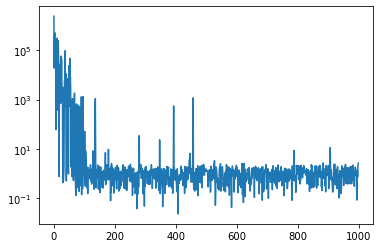

In [54]:
plt.plot(losses_torch)
plt.yscale('log')
#plt.plot(val_accuracy)

## 4. Test of the neural network 

In [55]:
X_test=data_test.values
Y_test=target_test.values
X_test, Y_test = map(torch.tensor, (X_test, Y_test))

In [56]:
model_torch.forward(X_test.float())

tensor([[ 0.1202, -0.1471,  0.0323,  0.0258],
        [ 0.1202, -0.1471,  0.0323,  0.0258],
        [ 0.1202, -0.1471,  0.0323,  0.0258],
        ...,
        [ 0.1202, -0.1471,  0.0323,  0.0258],
        [ 0.1202, -0.1471,  0.0323,  0.0258],
        [ 0.1202, -0.1471,  0.0323,  0.0258]], grad_fn=<AddmmBackward0>)

In [42]:
Y_test

tensor([[ 0.5073, -0.1337, -1.6735,  0.5567],
        [ 1.5767,  0.8229,  0.6798,  1.3443],
        [-1.6621,  0.3835, -0.7889, -1.6218],
        ...,
        [ 0.6221,  0.5021,  1.7252,  0.4934],
        [-0.6750, -1.5787,  0.5141, -0.6840],
        [-0.5016, -0.1635, -1.2034, -0.3828]], dtype=torch.float64)